<h1>Practical 10 — Implementing & Understanding <b>Variational Autoencoder (VAE)</b></h1>
<hr>

<h2>Objective</h2>
<p>
To implement and understand the working of a <b>Variational Autoencoder (VAE)</b> — a generative model that learns probabilistic latent representations and can generate new data similar to the training samples.
</p>

<hr>

<h2>1. Theory</h2>
<p>
A <b>Variational Autoencoder (VAE)</b> is a <b>generative deep learning model</b> that can generate new samples resembling the training data (e.g., handwritten digits, faces).  
Unlike a standard Autoencoder, which encodes data into a single latent vector, a VAE encodes each input as a <b>distribution</b> characterized by a mean (<b>μ</b>) and variance (<b>σ²</b>).
</p>

<hr>

<h2>2. Structure of a VAE</h2>

<table>
<tr><th>Component</th><th>Description</th></tr>
<tr>
<td><b>Encoder (Recognition / Inference Network)</b></td>
<td>Maps input <b>x</b> to latent variables <b>z</b>, represented by mean (<b>μ</b>) and standard deviation (<b>σ</b>): <br>
q<sub>φ</sub>(z|x) = N(μ(x), σ²(x))</td>
</tr>
<tr>
<td><b>Latent Space</b></td>
<td>A lower-dimensional probabilistic space from which <b>z</b> is sampled. Continuous and smooth, enabling interpolation.</td>
</tr>
<tr>
<td><b>Decoder (Generative Network)</b></td>
<td>Maps sampled <b>z</b> back to reconstruction <b>ẋ</b>, approximating original input <b>x</b>.</td>
</tr>
</table>

<hr>

<h2>3. Mathematical Formulation</h2>

<ul>
<li><b>Encoder Outputs:</b> μ = f<sub>μ</sub>(x), &nbsp; logσ² = f<sub>σ</sub>(x)</li>
<li><b>Sampling Layer (Reparameterization Trick):</b> z = μ + σ ⊙ ε, &nbsp; ε ∼ N(0, I)</li>
<li><b>Decoder Output:</b> ẋ = g(z)</li>
</ul>

<hr>

<h2>4. Reparameterization</h2>
<p>
Direct sampling from N(μ, σ²) breaks backpropagation.  
To make it differentiable, we reparameterize:
</p>
<p style="margin-left:20px;">
<b>z = μ + σ × ε</b>, &nbsp; where &nbsp; ε ∼ N(0, I)
</p>
<p>This ensures gradients can flow through μ and σ during training.</p>

<hr>

<h2>5. VAE Loss Function</h2>

<p>The total loss combines two components:</p>

<ul>
<li><b>Reconstruction Loss:</b> Measures how well the decoder reconstructs input x from ẋ.  
Usually <b>MSE</b> or <b>Binary Cross-Entropy</b>.</li>
<li><b>KL Divergence Loss:</b> Regularizes the latent space so that q<sub>φ</sub>(z|x) ≈ p(z), where p(z) = N(0, I).</li>
</ul>

<p><b>Total Objective:</b></p>
<p style="margin-left:20px;">
L<sub>VAE</sub> = L<sub>reconstruction</sub> + β × D<sub>KL</sub>(q<sub>φ</sub>(z|x) || p(z))
</p>

<p>
β (beta) is a weight used in <b>β-VAE</b> variants to control the trade-off between reconstruction accuracy and regularization.
</p>

<hr>

<h2>6. Intuitive Understanding</h2>

<ul>
<li>The <b>KL term</b> encourages a smooth and continuous latent space.</li>
<li>The <b>Reconstruction term</b> ensures input features are captured effectively.</li>
<li>Together, they enable:
  <ul>
    <li>Smooth interpolation between inputs</li>
    <li>Generation of new, realistic samples</li>
    <li>Structured, interpretable latent features</li>
  </ul>
</li>
</ul>

<hr>

<h2>7. Model Architecture Summary</h2>

<table>
<tr><th>Component</th><th>Purpose</th><th>Activation</th></tr>
<tr><td>Encoder Hidden Layers</td><td>Extract nonlinear features</td><td>ReLU / LeakyReLU</td></tr>
<tr><td>Encoder Output Layers</td><td>Compute mean (μ) and log variance (logσ²)</td><td>Linear</td></tr>
<tr><td>Sampling Layer</td><td>Generate latent vector via reparameterization</td><td>—</td></tr>
<tr><td>Decoder Hidden Layers</td><td>Map z back to reconstruction</td><td>ReLU / LeakyReLU</td></tr>
<tr><td>Decoder Output Layer</td><td>Generate reconstructed sample</td><td>Sigmoid (0–1 data) / Tanh (–1–1) / Linear (continuous)</td></tr>
</table>

<hr>

<h2>8. Simplified VAE Flow</h2>

<pre>
        Input (x)
            ↓
     [ Encoder Network ]
            ↓
      μ(x), σ(x)
            ↓
     z = μ + σ * ε
            ↓
     [ Decoder Network ]
            ↓
     Reconstructed Output (ẋ)
</pre>

<hr>

<h2>9. Difference: Autoencoder vs. Variational Autoencoder</h2>

<table>
<tr><th>Aspect</th><th>Autoencoder</th><th>Variational Autoencoder (VAE)</th></tr>
<tr><td>Latent Representation</td><td>Deterministic vector</td><td>Probabilistic (μ, σ²)</td></tr>
<tr><td>Sampling</td><td>No sampling</td><td>Uses reparameterization</td></tr>
<tr><td>Regularization</td><td>None</td><td>KL divergence</td></tr>
<tr><td>Generative Ability</td><td>Cannot generate new data</td><td>Can generate new samples</td></tr>
<tr><td>Loss Function</td><td>Reconstruction only</td><td>Reconstruction + KL Divergence</td></tr>
</table>

<hr>

<h2>10. Advantages</h2>
<ul>
<li>Learns a continuous latent space</li>
<li>Can generate new data</li>
<li>Enables interpolation and anomaly detection</li>
<li>Stable training (compared to GANs)</li>
</ul>

<h2>11. Disadvantages</h2>
<ul>
<li>Blurry outputs due to Gaussian assumptions</li>
<li>May underfit complex datasets</li>
<li>Requires careful β balancing</li>
</ul>

<hr>

<h2>12. Common Applications</h2>

<table>
<tr><th>Domain</th><th>Example</th></tr>
<tr><td>Image Generation</td><td>Generate digits (MNIST), faces (CelebA)</td></tr>
<tr><td>Anomaly Detection</td><td>Detect deviations from learned patterns</td></tr>
<tr><td>Data Compression</td><td>Compress high-dimensional inputs</td></tr>
<tr><td>Semi-supervised Learning</td><td>Leverage latent structure for classification</td></tr>
<tr><td>Representation Learning</td><td>Extract meaningful low-dimensional features</td></tr>
</table>

<hr>

<h2>🧾 13. Implementation Notes</h2>

<p>If <b>Basic Autoencoder</b> uses:</p>

<pre>
encoder: Linear + ReLU
decoder: Linear + Sigmoid
</pre>

<p>Then <b>VAE</b> should use:</p>

<pre>
# Encoder
encoder_hidden: ReLU
encoder_output (μ, logσ²): Linear

# Sampling (Reparameterization)
z = μ + σ * ε

# Decoder
decoder_hidden: ReLU
decoder_output: Sigmoid (for normalized data)
</pre>

<h2>Summary</h2>
<p>
A <b>Variational Autoencoder</b> merges deep learning with probabilistic modeling to learn a <b>structured, continuous latent space</b> that supports both <b>generation</b> and <b>representation learning</b>.  
It forms the basis for modern generative AI systems.
</p>

<hr>

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_16[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 3136)      │          0 │ conv2d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │     50,192 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_8          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_25             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_26             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 64: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 68: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 78: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 81: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 81: early stopping
Restoring model weights from the end of the best epoch: 75.


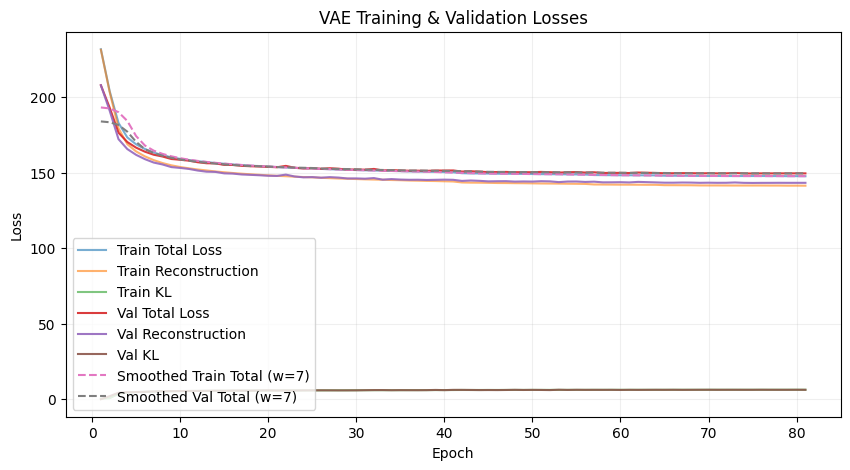

Training ran for epochs: 81


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


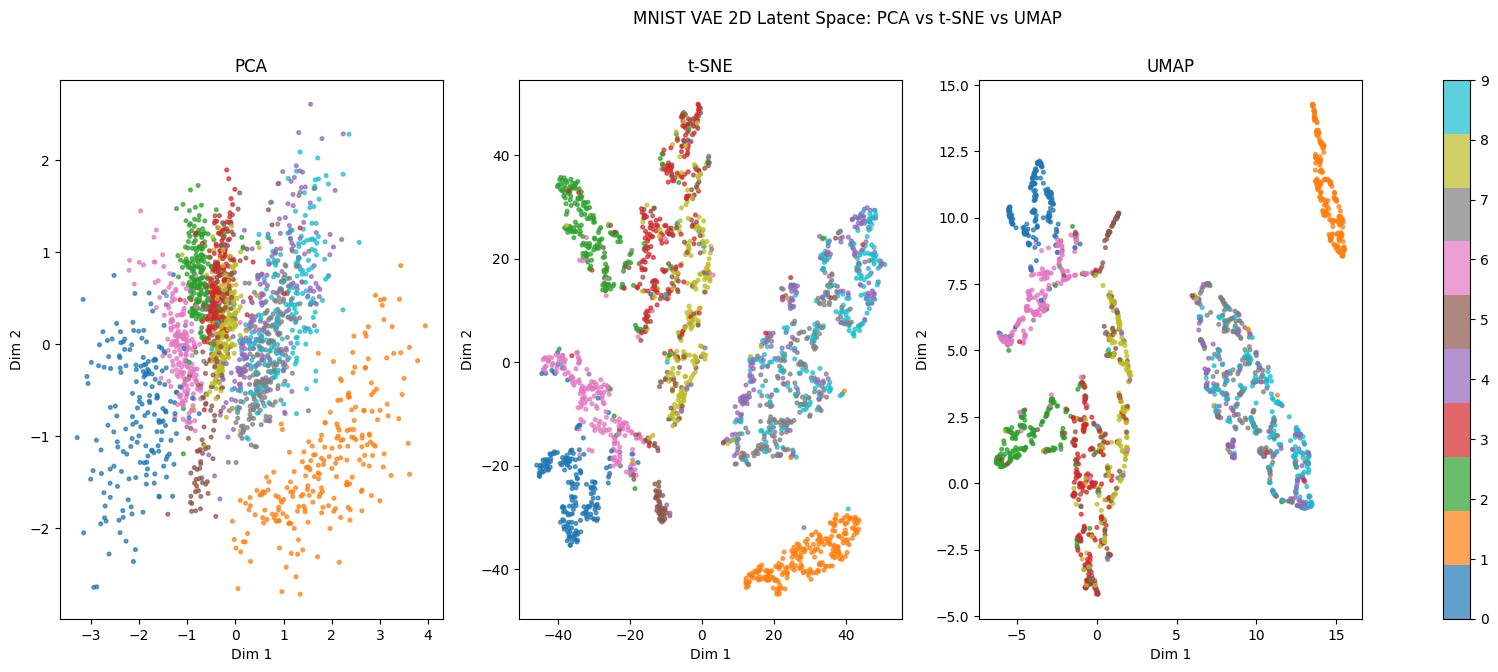

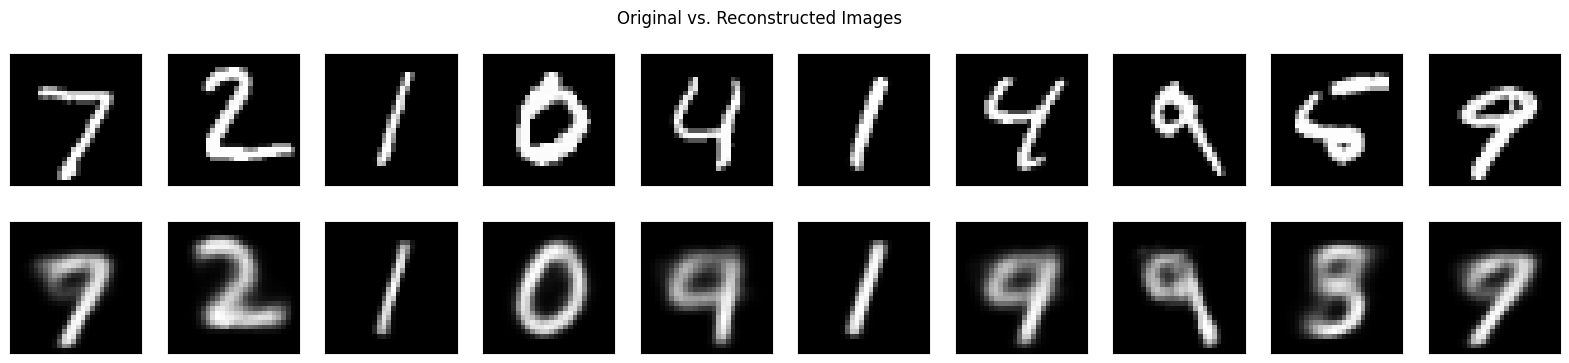

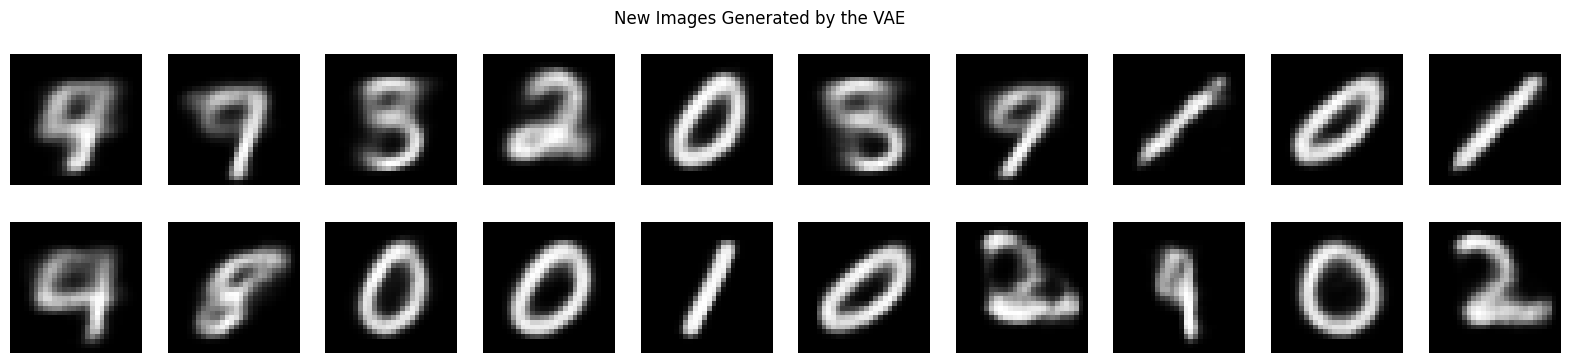

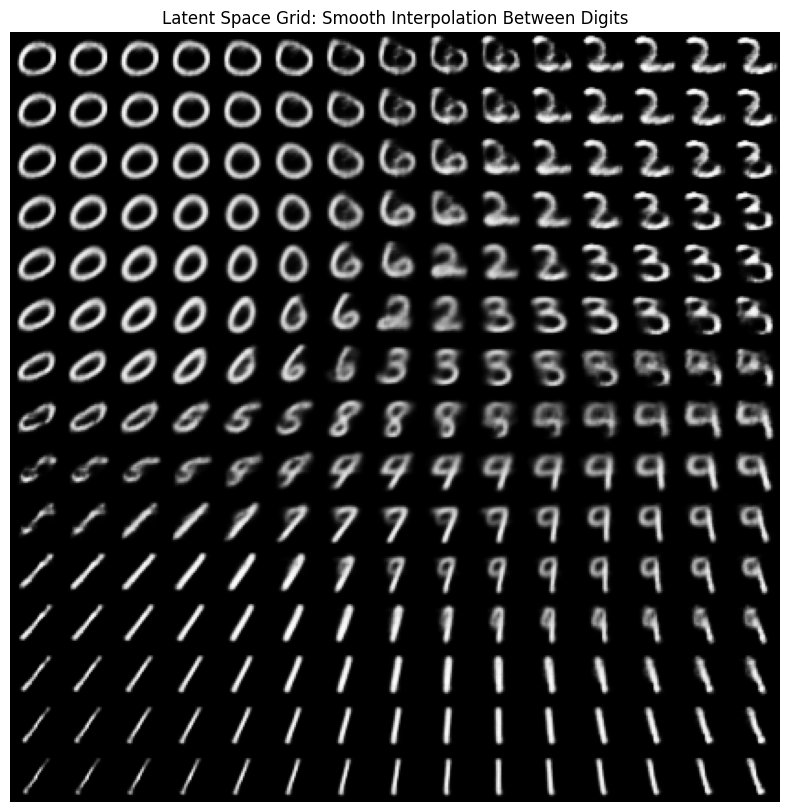

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# Dimensionality reduction imports
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# -------------------------
# VAE Sampling layer
# -------------------------
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# -------------------------
# Model hyperparams
# -------------------------
latent_dim = 2  # note: set >1 for richer latent representations

# -------------------------
# Encoder
# -------------------------
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# -------------------------
# Decoder
# -------------------------
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# -------------------------
# VAE model definition
# -------------------------
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

        # --- metrics to track (Keras will reset them each epoch) ---
        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

        # Validation metrics (optional separate trackers)
        self.val_total_loss_tracker = keras.metrics.Mean(name="val_loss")
        self.val_reconstruction_loss_tracker = keras.metrics.Mean(name="val_reconstruction_loss")
        self.val_kl_loss_tracker = keras.metrics.Mean(name="val_kl_loss")

    @property
    def metrics(self):
        # Keras uses this list to reset metrics at the start of each epoch.
        # Include both train and val trackers so fit() can show/record them.
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.val_total_loss_tracker,
            self.val_reconstruction_loss_tracker,
            self.val_kl_loss_tracker,
        ]

    def compute_losses(self, data, training=False):
        """Return (total_loss, reconstruction_loss, kl_loss) for a batch."""
        z_mean, z_log_var, z = self.encoder(data, training=training)
        reconstruction = self.decoder(z, training=training)
        # Binary crossentropy returns per-pixel loss (shape: batch, 28*28)
        reconstruction_loss = tf.reduce_mean(
            keras.losses.binary_crossentropy(data, reconstruction)
        ) * 28 * 28
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
        )
        kl_loss = tf.reduce_mean(kl_loss)
        total_loss = reconstruction_loss + kl_loss
        return total_loss, reconstruction_loss, kl_loss

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]  # unsupervised, so ignore labels if any
        with tf.GradientTape() as tape:
            total_loss, reconstruction_loss, kl_loss = self.compute_losses(data, training=True)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # update training metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        # return dict of metric name -> value (Keras uses this for History)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        """Called during validation: compute losses and update val metrics."""
        if isinstance(data, tuple):
            data = data[0]
        total_loss, reconstruction_loss, kl_loss = self.compute_losses(data, training=False)

        # Update validation metrics trackers
        self.val_total_loss_tracker.update_state(total_loss)
        self.val_reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.val_kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.val_total_loss_tracker.result(),
            "reconstruction_loss": self.val_reconstruction_loss_tracker.result(),
            "kl_loss": self.val_kl_loss_tracker.result(),
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

# -------------------------
# Prepare and normalize MNIST
# -------------------------
(x_train, _), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0

# -------------------------
# Training helper + plotting
# -------------------------
def smooth_array(x, window_len=5):
    """Simple moving-average smoothing. Returns original if window_len<=1 or too short."""
    x = np.asarray(x)
    if window_len is None or window_len <= 1 or x.size < window_len:
        return x
    s = np.r_[x[window_len-1:0:-1], x, x[-2:-window_len-1:-1]]
    w = np.ones(window_len)/window_len
    y = np.convolve(w, s, mode='valid')
    # align trimmed edges back to original length
    trim = (window_len // 2)
    return y[trim: trim + x.size]

def train_vae_and_plot(vae, x_train, epochs=50, batch_size=128,
                       validation_data=None, callbacks=None,
                       verbose=0, smooth_window=None, **fit_kwargs):
    """
    Trains the VAE (using model.fit) and plots loss curves.
    - smooth_window: int or None. If int>1, plot moving-average-smoothed curves too.
    Returns: history (keras History)
    """
    history = vae.fit(
        x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=validation_data,
        callbacks=callbacks,
        verbose=verbose,
        **fit_kwargs
    )

    hist = history.history
    steps = range(1, len(hist["loss"]) + 1)

    plt.figure(figsize=(10,5))
    # raw curves
    plt.plot(steps, hist["loss"], label="Train Total Loss", alpha=0.6)
    if "reconstruction_loss" in hist:
        plt.plot(steps, hist["reconstruction_loss"], label="Train Reconstruction", alpha=0.6)
    if "kl_loss" in hist:
        plt.plot(steps, hist["kl_loss"], label="Train KL", alpha=0.6)

    if "val_loss" in hist:
        plt.plot(steps, hist["val_loss"], label="Val Total Loss", alpha=0.9)
    if "val_reconstruction_loss" in hist:
        plt.plot(steps, hist["val_reconstruction_loss"], label="Val Reconstruction", alpha=0.9)
    if "val_kl_loss" in hist:
        plt.plot(steps, hist["val_kl_loss"], label="Val KL", alpha=0.9)

    # optional smoothed curves
    if smooth_window is not None and isinstance(smooth_window, int) and smooth_window > 1:
        try:
            sm_loss = smooth_array(np.array(hist["loss"]), window_len=smooth_window)
            plt.plot(steps, sm_loss, linestyle="--", label=f"Smoothed Train Total (w={smooth_window})")
            if "val_loss" in hist:
                sm_val = smooth_array(np.array(hist["val_loss"]), window_len=smooth_window)
                plt.plot(steps, sm_val, linestyle="--", label=f"Smoothed Val Total (w={smooth_window})")
        except Exception:
            pass

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("VAE Training & Validation Losses")
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

    return history

# -------------------------
# Instantiate, compile and train
# -------------------------
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adamax(learning_rate=1e-3))
# -------------------------
# Callbacks: EarlyStopping + ReduceLROnPlateau
# -------------------------
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',         # monitor validation total loss
    patience=6,                 # number of epochs with no improvement before stopping
    restore_best_weights=True,  # restore model weights from the epoch with best monitored value
    min_delta=1e-4,             # minimum change to qualify as improvement
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train and plot (this returns the History object)
#history = train_vae_and_plot(vae, x_train, epochs=50, batch_size=128, verbose=0)
history = train_vae_and_plot(
    vae,
    x_train,
    epochs=100,             # higher max epochs; early stopping will stop earlier if no improvement
    batch_size=128,
    validation_data=x_test, # validation inputs (no labels needed)
    callbacks=[early_stop, reduce_lr],
    verbose=0,
    smooth_window=7
)
print("Training ran for epochs:", len(history.history['loss']))
# -------------------------
# Visualize latent projections (PCA, t-SNE, UMAP)
# -------------------------
# Get latent vectors (means) for test set
z_mean, _, _ = encoder.predict(x_test, batch_size=128, verbose=0)

# For scalability, sample 2000 points
n_samples = 2000
indices = np.random.choice(len(z_mean), size=n_samples, replace=False)
z_subset = z_mean[indices]
y_subset = y_test[indices]

# Apply PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
z_tsne = tsne.fit_transform(z_subset)

# Apply UMAP
z_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(z_subset)

# Plot all three projections for comparison
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
methods = [('PCA', z_pca), ('t-SNE', z_tsne), ('UMAP', z_umap)]
for i, (name, z_vis) in enumerate(methods):
    sc = axs[i].scatter(z_vis[:,0], z_vis[:,1], c=y_subset, cmap='tab10', s=7, alpha=0.7)
    axs[i].set_title(name)
    axs[i].set_xlabel("Dim 1")
    axs[i].set_ylabel("Dim 2")
fig.colorbar(sc, ax=axs, ticks=range(10))
plt.suptitle("MNIST VAE 2D Latent Space: PCA vs t-SNE vs UMAP")
plt.show()

# -------------------------
# Display original and reconstructed images
# -------------------------
n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    reconstructed_img = vae.predict(x_test[i].reshape(1, 28, 28, 1),verbose=0)
    plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Original vs. Reconstructed Images")
plt.show()
# -------------------------
# Generate New Images from Random Latent Samples
# -------------------------

# Number of new images to generate
n_images = 20

# Sample random latent vectors from standard normal distribution
random_latent_vectors = np.random.normal(size=(n_images, latent_dim))

# Decode these latent points into new images
generated_images = decoder.predict(random_latent_vectors,verbose=0)

# Plot the generated images
plt.figure(figsize=(20, 4))
for i in range(n_images):
    ax = plt.subplot(2, n_images//2, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")

plt.suptitle("New Images Generated by the VAE")
plt.show()
# -------------------------
# Generate 2D latent space grid
# -------------------------
grid_size = 15
figure = np.zeros((28 * grid_size, 28 * grid_size))
# Linearly spaced coordinates corresponding to the quantiles of a normal distribution
grid_x = np.linspace(-3, 3, grid_size)
grid_y = np.linspace(-3, 3, grid_size)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28,
               j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.axis("off")
plt.title("Latent Space Grid: Smooth Interpolation Between Digits")
plt.show()
